In [1]:
from dataset import get_custom_dataset, prepare_dataset, prepare_partitioned_dataset, prepare_imbalance_label_dirichlet, prepare_noise_based_imbalance, prepare_quantity_skew_dirichlet

import torch
from torch.utils.data import DataLoader, random_split, Subset
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, Normalize, ToTensor
import os
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, Grayscale, ToTensor
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trainset, testset = get_custom_dataset()

[2, 2]
[[0], [1], [0], [1]]
Partition 0 class distribution: {0: 601}
Partition 1 class distribution: {1: 1747}
Partition 2 class distribution: {0: 600}
Partition 3 class distribution: {1: 1746}


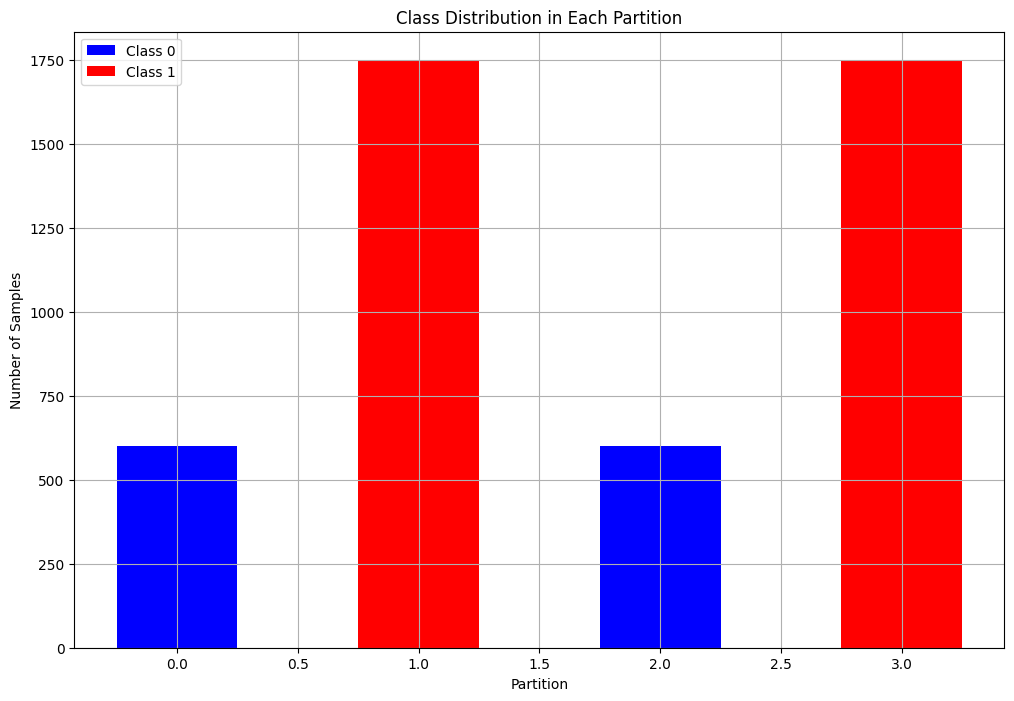

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7f85f3d4cd00>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85d48ba1f0>)

In [6]:
prepare_partitioned_dataset(4, 32, 0.1, 1)

[4, 4]
[[0, 1], [1, 0], [0, 1], [1, 0]]
Partition 0 class distribution: {1: 874, 0: 301}
Partition 1 class distribution: {0: 300, 1: 873}
Partition 2 class distribution: {0: 300, 1: 873}
Partition 3 class distribution: {1: 873, 0: 300}


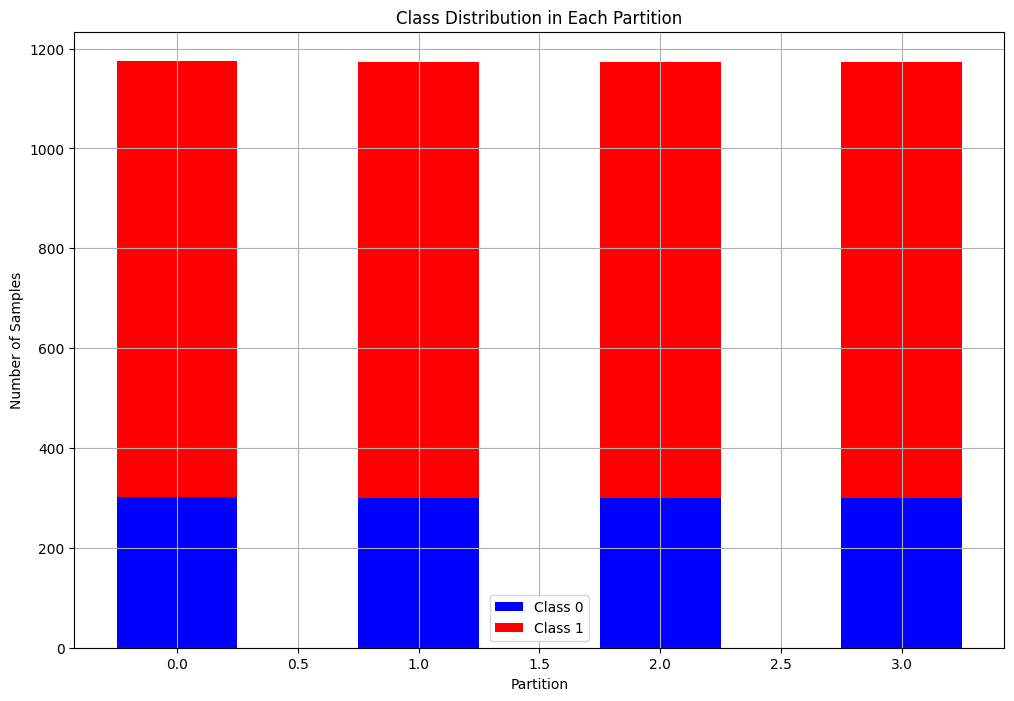

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7f85f3d38520>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85f3cb2490>)

In [7]:
prepare_partitioned_dataset(4, 32, 0.1, 2)

In [23]:
trainset

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: ./data/train
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [27]:
trainset, testset = get_custom_dataset()
num_train = int((1 - 0.1) * len(trainset))
num_val = len(trainset) - num_train
trainset, valset = random_split(trainset, [num_train, num_val], generator=torch.Generator().manual_seed(2023))


In [31]:
trainset.dataset[0][0].shape

torch.Size([1, 100, 100])

In [24]:
trainset.indices

AttributeError: 'ImageFolder' object has no attribute 'indices'

In [25]:
trainset[0][0].shape

torch.Size([1, 100, 100])

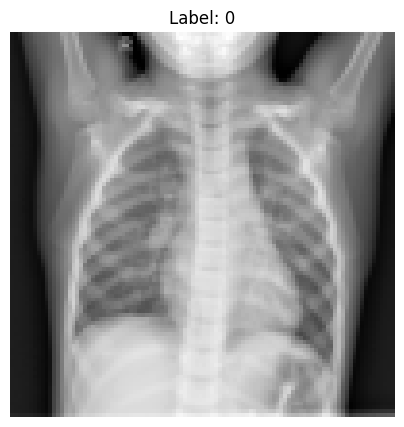

In [10]:
import matplotlib.pyplot as plt
import numpy as np
image, label = trainset[0]
image = image.numpy().transpose((1, 2, 0))

# Hiển thị ảnh
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [16]:
#add noise gaussian
mean = 0
std = 0.06
gaussan_noise = np.random.normal(mean, std, image.shape)
noisy_image = image + gaussan_noise

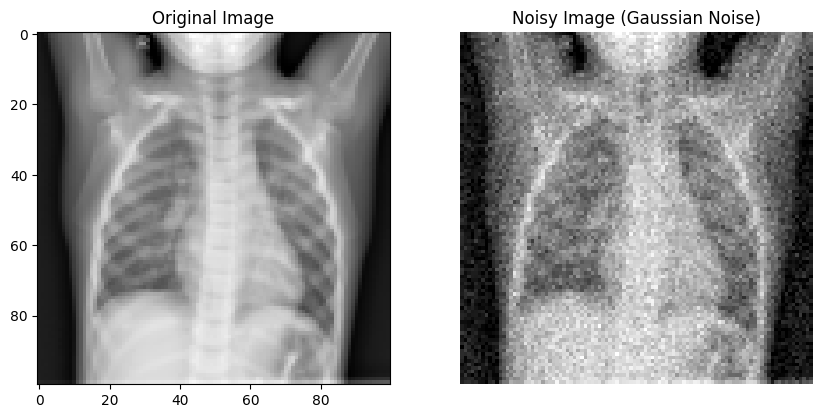

In [17]:
noisy_image = np.clip(noisy_image, 0, 1)

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Hiển thị ảnh bị nhiễu
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

plt.show()

In [3]:
from torch.utils.data import DataLoader, random_split, Subset


In [4]:
    num_train = int((1 - 0.1) * len(trainset))
    num_val = len(trainset) - num_train
    trainset, valset = random_split(trainset, [num_train, num_val], torch.Generator().manual_seed(2024))

In [5]:
trainset.indices

[4584,
 211,
 438,
 2913,
 1563,
 4285,
 2416,
 3800,
 1873,
 3578,
 1175,
 3945,
 599,
 238,
 3548,
 987,
 1797,
 2455,
 3967,
 3194,
 3319,
 3744,
 3228,
 4509,
 1319,
 1369,
 4387,
 3596,
 151,
 187,
 2834,
 2699,
 4631,
 4621,
 5180,
 2389,
 948,
 1100,
 1533,
 3140,
 4798,
 3818,
 524,
 4440,
 973,
 3066,
 981,
 2512,
 4358,
 2752,
 3225,
 623,
 2502,
 4112,
 1430,
 2832,
 3960,
 1074,
 2101,
 2876,
 1514,
 2925,
 2276,
 2127,
 2581,
 942,
 3263,
 1590,
 4083,
 3570,
 2865,
 5023,
 3335,
 3125,
 2856,
 4394,
 663,
 1953,
 515,
 1401,
 239,
 3358,
 4930,
 4340,
 665,
 3105,
 4460,
 1041,
 4552,
 4829,
 3745,
 1245,
 3525,
 3944,
 2353,
 3449,
 277,
 1340,
 2648,
 594,
 4701,
 1184,
 4186,
 17,
 890,
 3725,
 1266,
 3332,
 1142,
 2746,
 3929,
 4250,
 2662,
 3551,
 2518,
 1962,
 2556,
 3635,
 4663,
 563,
 1982,
 3743,
 4389,
 3031,
 4386,
 2909,
 2035,
 4354,
 5002,
 1687,
 5133,
 3227,
 1406,
 2417,
 5208,
 4166,
 4203,
 1881,
 389,
 2976,
 4492,
 2769,
 3404,
 3494,
 4739,
 3341,
 3

In [6]:
len(trainset)

4694

Partition 0 class distribution: {1: 859, 0: 289}
Partition 1 class distribution: {1: 897, 0: 288}
Partition 2 class distribution: {1: 860, 0: 292}
Partition 3 class distribution: {1: 877, 0: 332}


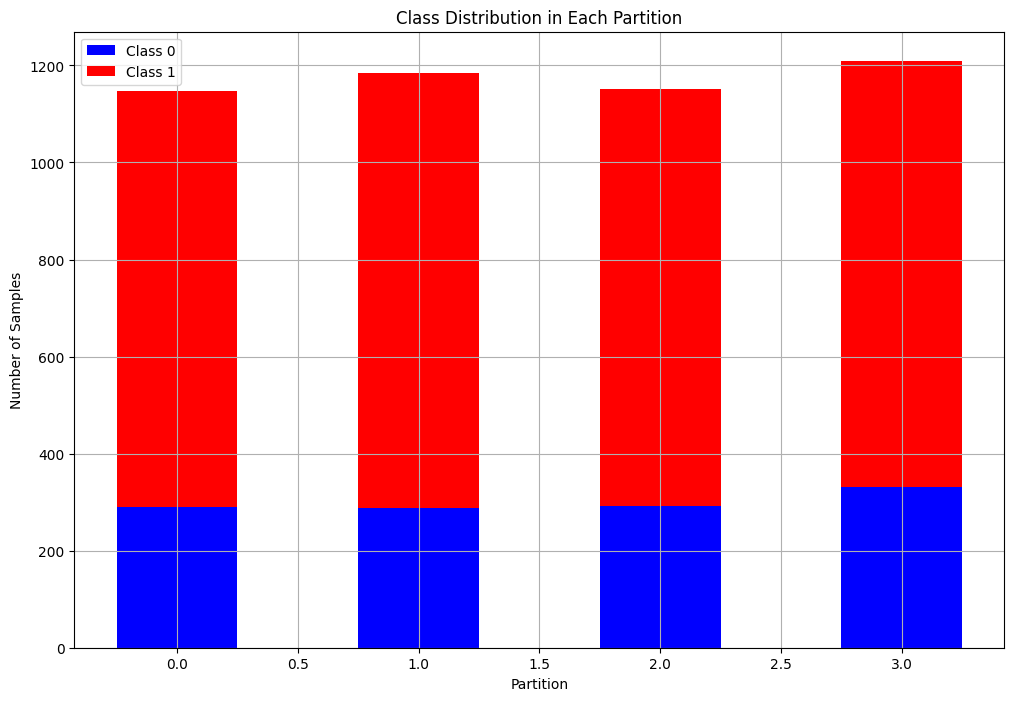

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7a77419bad30>,
 <torch.utils.data.dataloader.DataLoader at 0x7a77f7de2760>)

In [9]:
prepare_imbalance_label_dirichlet(4, 32, 0.1, 100)

In [18]:
prepare_imbalance_label_dirichlet(4, 32, 0.1, 0.5)

Partition 0 class distribution: {0: 317, 1: 63}


KeyboardInterrupt: 

Partition 0 class distribution: {0: 315, 1: 846}
Partition 1 class distribution: {1: 733, 0: 343}
Partition 2 class distribution: {1: 887, 0: 316}
Partition 3 class distribution: {0: 227, 1: 1027}


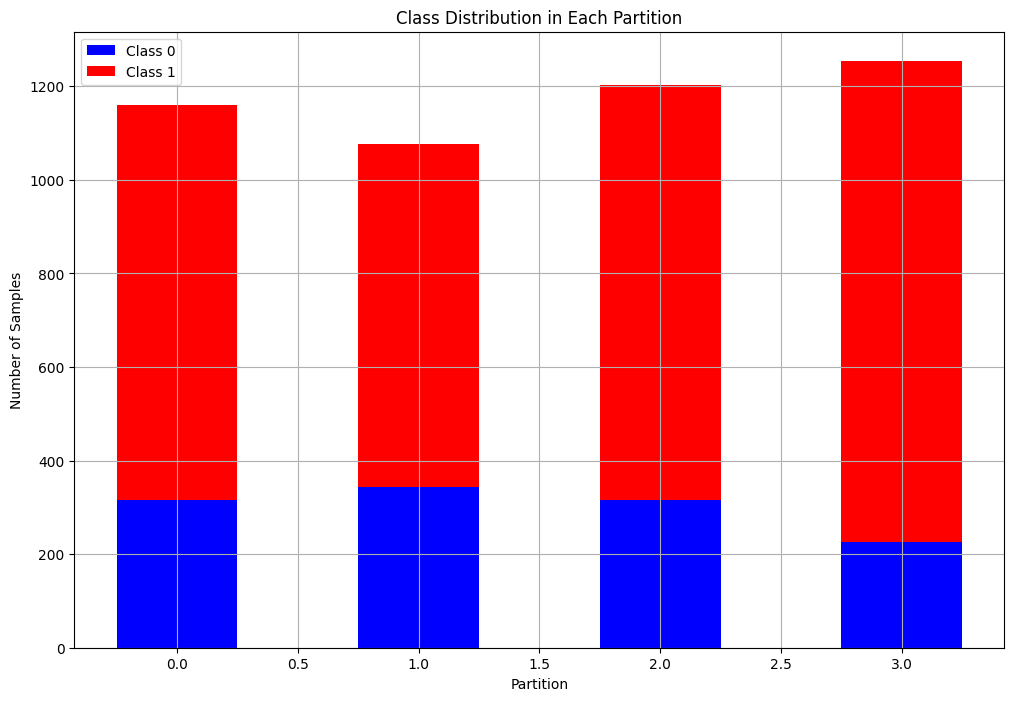

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7a775d3abaf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a775d3abc10>)

In [11]:
prepare_imbalance_label_dirichlet(4, 32, 0.1, 20)

Partition 0 class distribution: {0: 433, 1: 1017}
Partition 1 class distribution: {1: 1380, 0: 193}
Partition 2 class distribution: {0: 312, 1: 171}
Partition 3 class distribution: {1: 925, 0: 263}


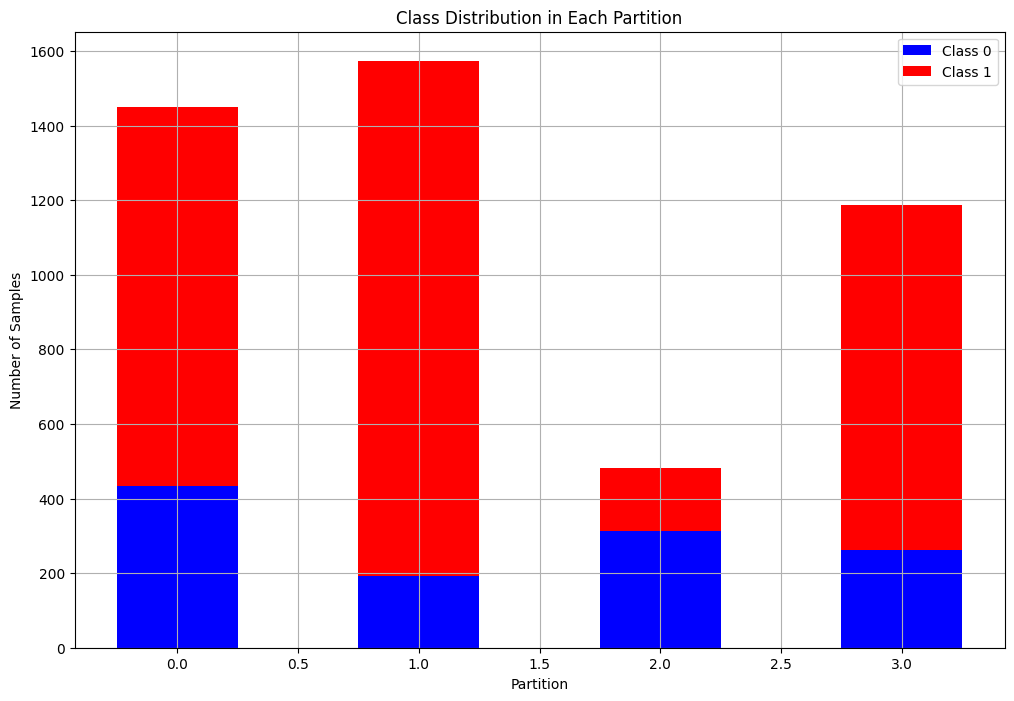

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7f85f29071f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85f2924d60>)

In [8]:
prepare_imbalance_label_dirichlet(4, 32, 0.1, 1)

In [8]:
# from dataset import prepare_partitioned_dataset
# prepare_partitioned_dataset(6, 32, 0.1, 1)

[3, 3]
[[0], [1], [0], [1], [0], [1]]


Partition 0 class distribution: {0: 401}
Partition 1 class distribution: {1: 1165}
Partition 2 class distribution: {0: 400}
Partition 3 class distribution: {1: 1164}
Partition 4 class distribution: {0: 400}


KeyboardInterrupt: 

In [19]:
trainloaders, _, _ = prepare_noise_based_imbalance(4, 32, 0.1, 0.1)

In [10]:
trainloader = trainloaders[0]
trainloader

In [15]:
trainloader.dataset[0][0].shape

torch.Size([1, 100, 100])

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/media/namvq/Data/anaconda3/envs/env1/lib/python3.9/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/media/namvq/Data/anaconda3/envs/env1/lib/python3.9/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/media/namvq/Data/anaconda3/envs/env1/lib/python3.9/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/media/namvq/Data/anaconda3/envs/env1/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/media/namvq/Data/anaconda3/envs/env1/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/media/namvq/Data/anaconda3/envs/env1/lib/python3.9/threading.py", line 917, in run
    self._target(*self.

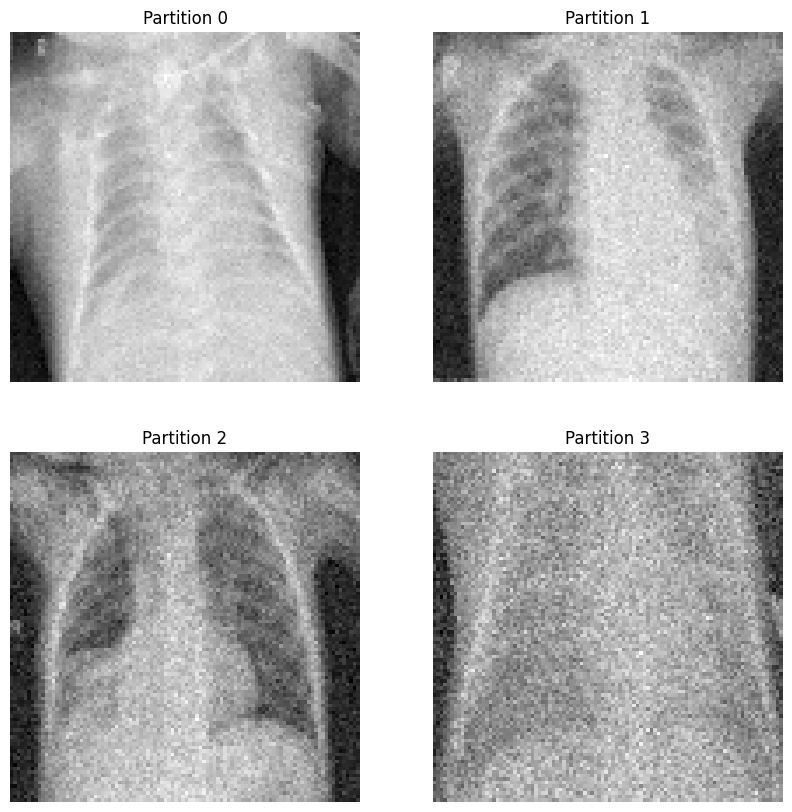

In [20]:
import matplotlib.pyplot as plt

# Giả sử trainloaders đã được định nghĩa và khởi tạo
num_subplots = 4
plt.figure(figsize=(10, 10))

for i, trainloader in enumerate(trainloaders[:num_subplots]):
    img = trainloader.dataset[0][0]

    # Tạo subplot
    plt.subplot(2, 2, i + 1)
    plt.imshow(img.numpy().transpose((1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.title(f'Partition {i}')

plt.show()

Partition sizes: [1855, 1816, 249, 774]
Partition 0 class distribution: {1: 1387, 0: 468}
Partition 1 class distribution: {0: 475, 1: 1341}
Partition 2 class distribution: {1: 195, 0: 54}
Partition 3 class distribution: {0: 204, 1: 570}


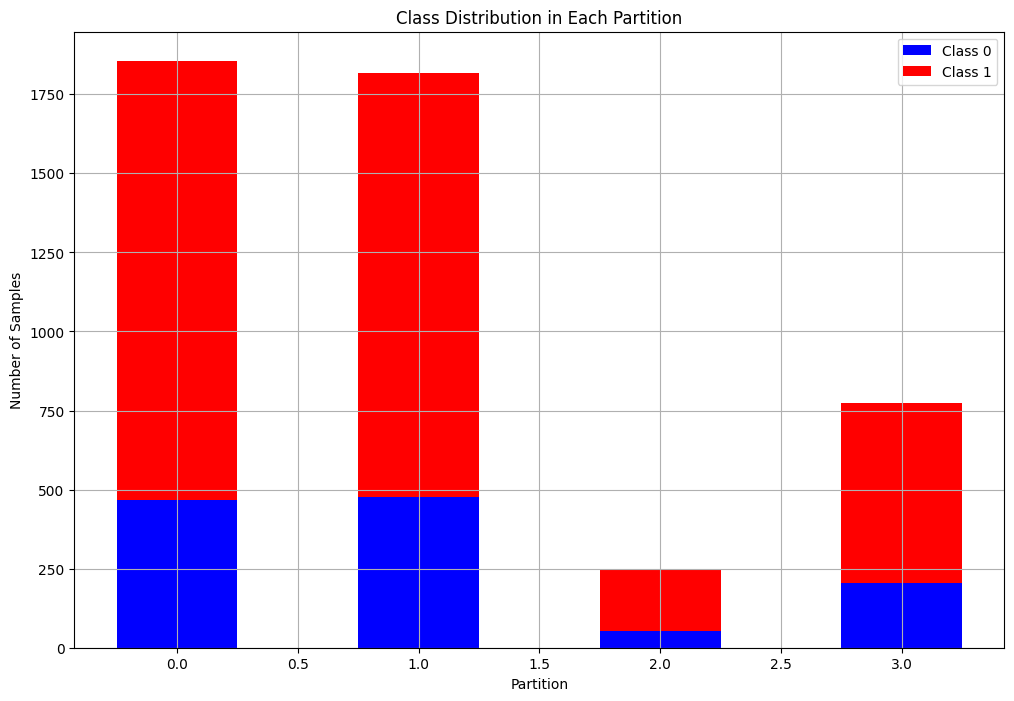

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7f85d46a21c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85d56f3880>)

In [5]:
prepare_quantity_skew_dirichlet(4, 32, 0.1, 1)

Partition sizes: [830, 1033, 1416, 1415]
Partition 0 class distribution: {1: 621, 0: 209}
Partition 1 class distribution: {1: 773, 0: 260}
Partition 2 class distribution: {1: 1049, 0: 367}
Partition 3 class distribution: {1: 1050, 0: 365}


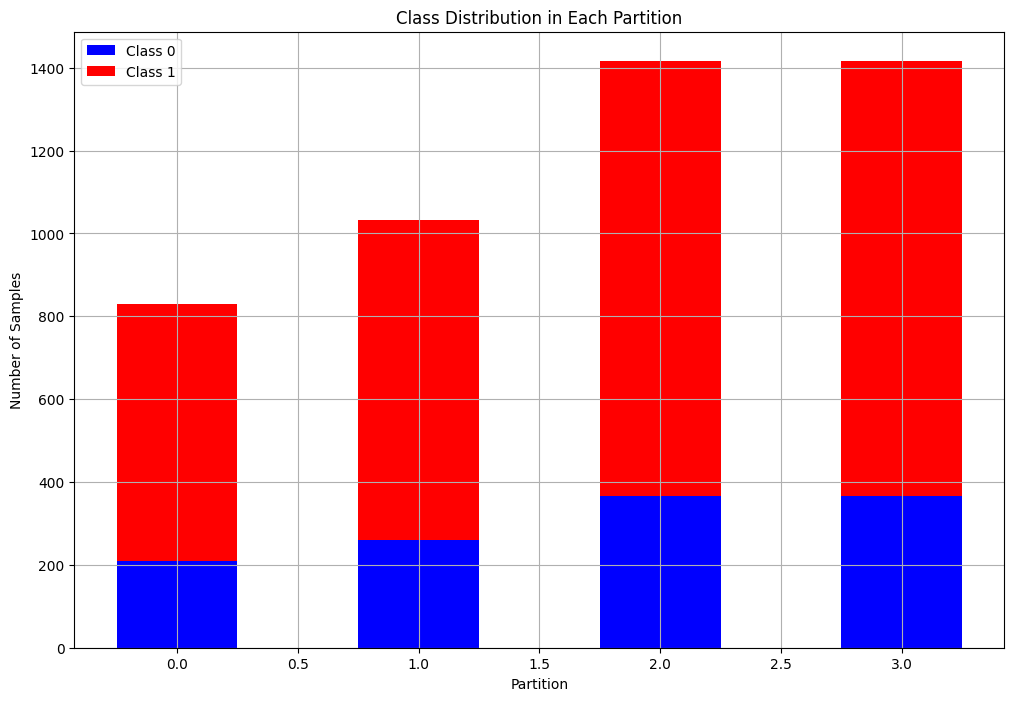

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7f85f3ccefd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f85f3cbf520>)

In [4]:
prepare_quantity_skew_dirichlet(4, 32, 0.1, 5)

Partition sizes: [1401, 1187, 1042, 1064]
Partition 0 class distribution: {1: 1053, 0: 348}
Partition 1 class distribution: {1: 872, 0: 315}
Partition 2 class distribution: {1: 775, 0: 267}
Partition 3 class distribution: {1: 793, 0: 271}


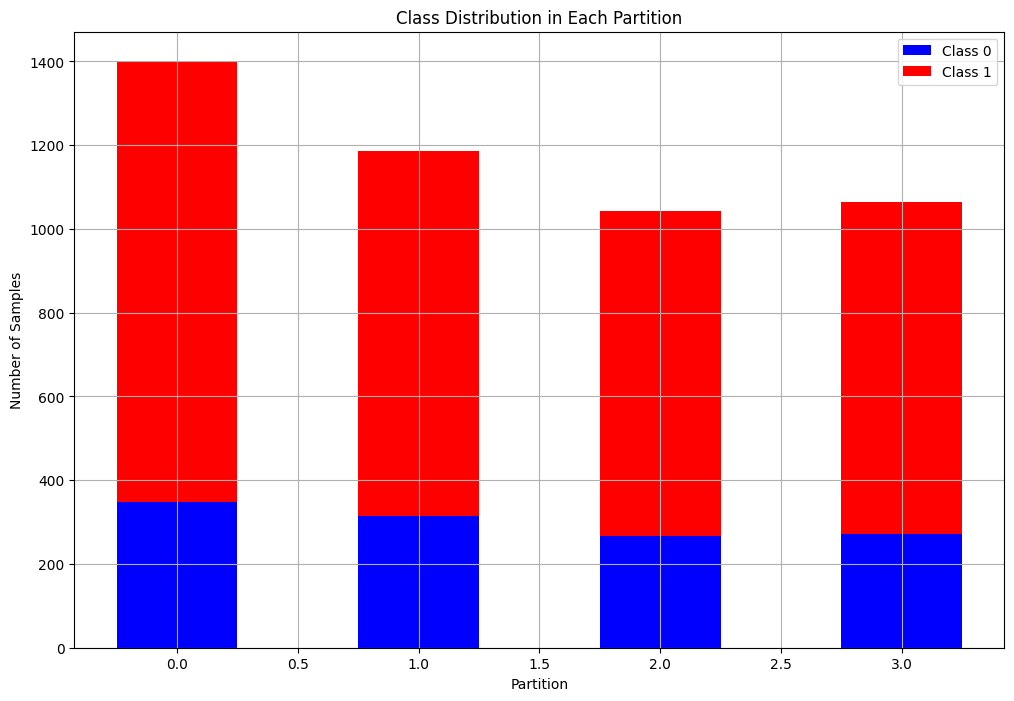

Number of train samples: 4694, val samples: 522, test samples: 624


([<torch.utils.data.dataloader.DataLoader at 0x7f8692e5f700>,
 <torch.utils.data.dataloader.DataLoader at 0x7f86937f2700>)

In [3]:
prepare_quantity_skew_dirichlet(4, 32, 0.1, 100)